<a href="https://colab.research.google.com/github/juankost/AML-projects/blob/main/AML_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Input the data

In [3]:
x_train_path = "/content/drive/My Drive/Estudio/ETH DAS Data Science/Advanced Machine Learning/task1/X_train.csv"
y_train_path = "/content/drive/My Drive/Estudio/ETH DAS Data Science/Advanced Machine Learning/task1/y_train.csv"
x_test_path = "/content/drive/My Drive/Estudio/ETH DAS Data Science/Advanced Machine Learning/task1/X_test.csv"
x_train_raw = pd.read_csv(x_train_path)
x_test = pd.read_csv(x_test_path)
y_train_raw = pd.read_csv(y_train_path)

# Split the training data into a training set and a validation set
n_samples = len(x_train_raw)
n_training = n_samples *9//10
x_train = x_train_raw # .iloc[:n_training, :] # 90% training
y_train = y_train_raw["y"] # .iloc[:n_training, :] # 90% training


In [10]:
# Desriptive stats of the data
feature_subset = ['x537', 'x184', 'x685', 'x289', 'x597', 'x85', 'x473', 'x227', 'x726', 'x129', 'x170', 'x785', 'x776', 'x408', 'x559', 'x672', 'x619', 'x223', 'x496', 'x717']
print(x_train.describe())
print(y_train.describe())
# .loc[["min", "max"], x_train.columns]


                id           x0  ...           x830           x831
count  1212.000000  1212.000000  ...    1212.000000    1212.000000
mean    605.500000    10.024042  ...   99798.745023  104898.148269
std     350.018571     0.930031  ...    9221.631931    2626.517346
min       0.000000     6.672068  ...   73207.994891  100012.896777
25%     302.750000     9.440852  ...   94149.196760  102892.311899
50%     605.500000    10.000079  ...   99802.127899  104846.235709
75%     908.250000    10.624582  ...  105761.210966  106826.950763
max    1211.000000    12.956099  ...  130694.436443  109984.169649

[8 rows x 833 columns]
count    1212.000000
mean       69.665842
std         9.831347
min        42.000000
25%        64.000000
50%        70.000000
75%        76.000000
max        97.000000
Name: y, dtype: float64


In [ ]:
# Data distribution

features = ["x533"]
# sns.displot(x_train, x="x533", kind="kde", bw_adjust=1)
sns.displot(x_train, x="x533", hue = "x612")

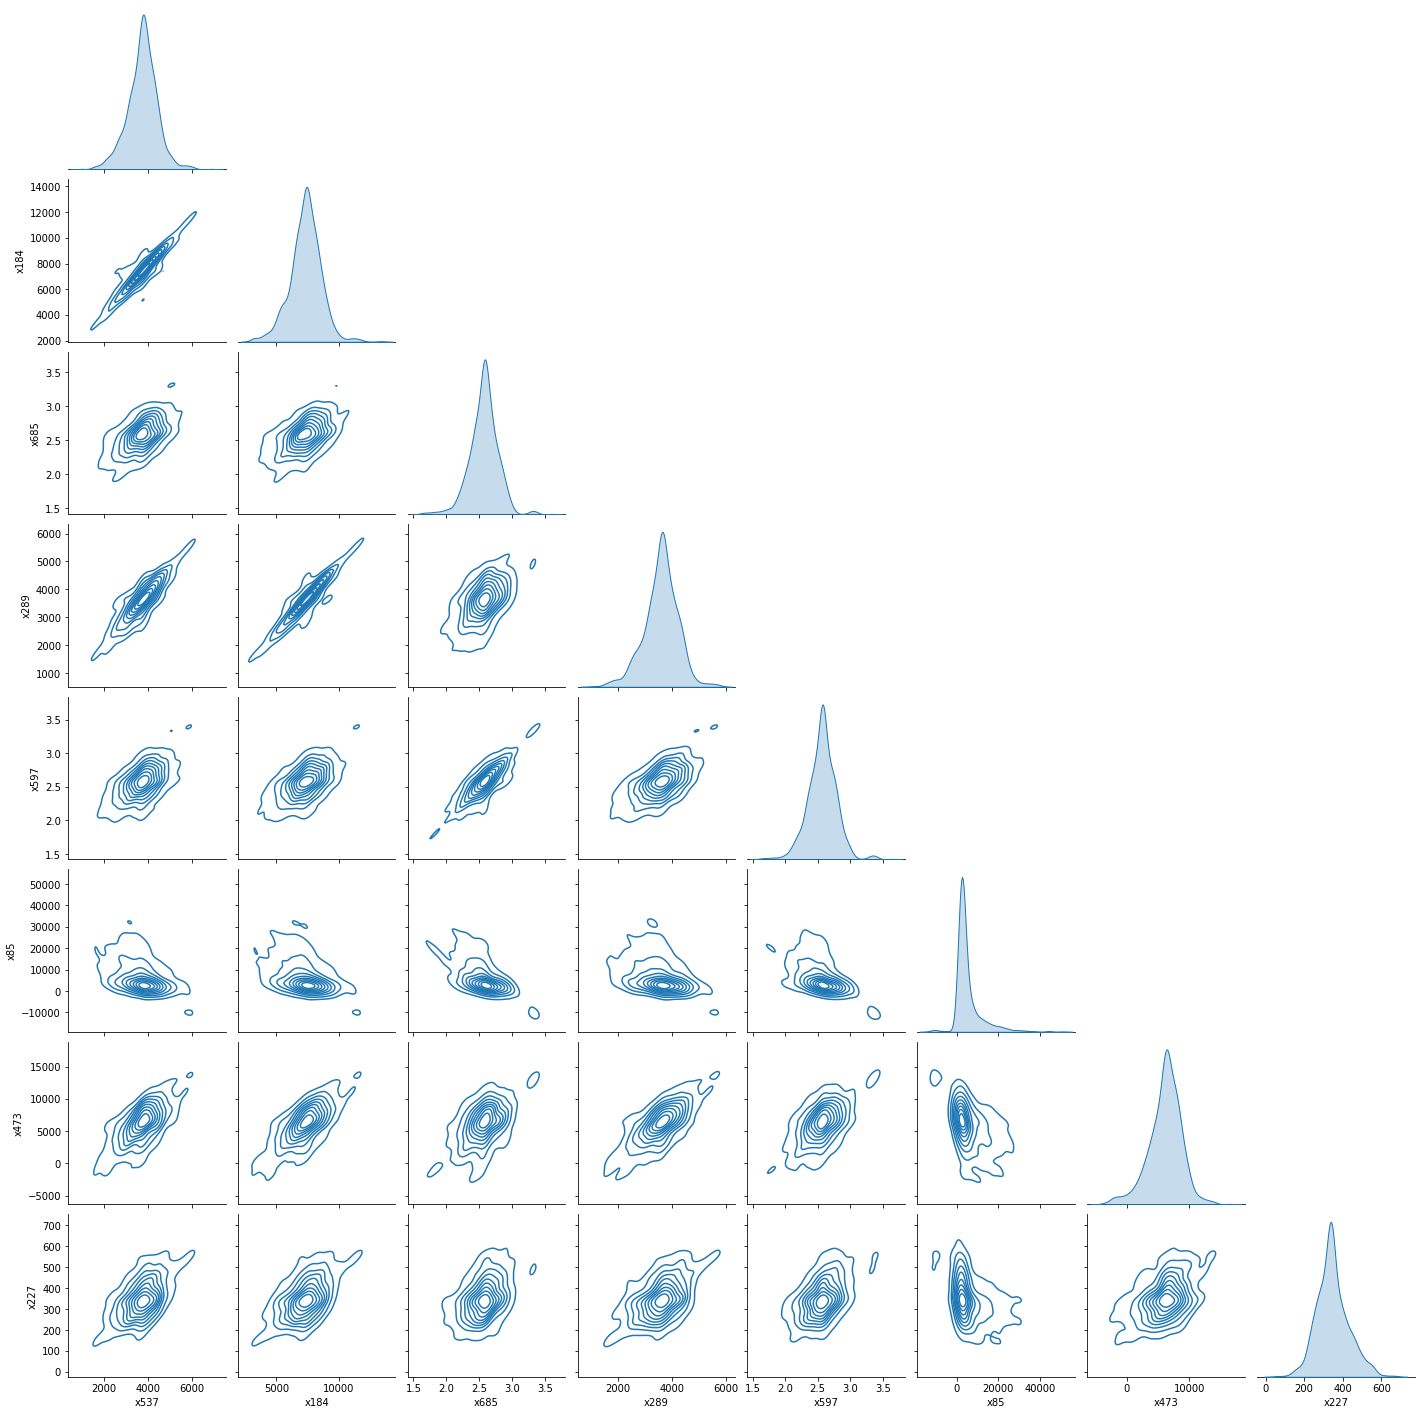

In [6]:
# Data distribution - pairplots
features = ['x537', 'x184', 'x685', 'x289', 'x597', 'x85', 'x473', 'x227'] 

# sns.pairplot(x_train[features],  hue="x129")
# sns.pairplot(x_train[features],  hue="x129", diag_kind="hist")
# sns.pairplot(x_train[features])
# sns.pairplot(x_train[features], kind="kde")
sns.pairplot(x_train[features], kind="kde", corner=True)

In [17]:
# Data Correlation:
correlations = x_train.corr()
correlations = correlations[correlations > 0.7]
correlations.dropna(thresh=1)

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,...,x792,x793,x794,x795,x796,x797,x798,x799,x800,x801,x802,x803,x804,x805,x806,x807,x808,x809,x810,x811,x812,x813,x814,x815,x816,x817,x818,x819,x820,x821,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
x828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
x829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
x830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


,x537,x184,x685,x289,x597,x85,x473,x227,x726,x129,x170,x785,x776,x408,x559,x672,x619,x223,x496,x717
x537,1.000000,0.901541,NaN,0.834607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753027,NaN,NaN,NaN,NaN
x184,0.901541,1.000000,NaN,0.890067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705290,NaN,NaN,NaN,NaN
x685,NaN,NaN,1.000000,NaN,0.800887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x289,0.834607,0.890067,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x597,NaN,NaN,0.800887,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x85,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x473,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.746911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.746911,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.789118,NaN
x129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


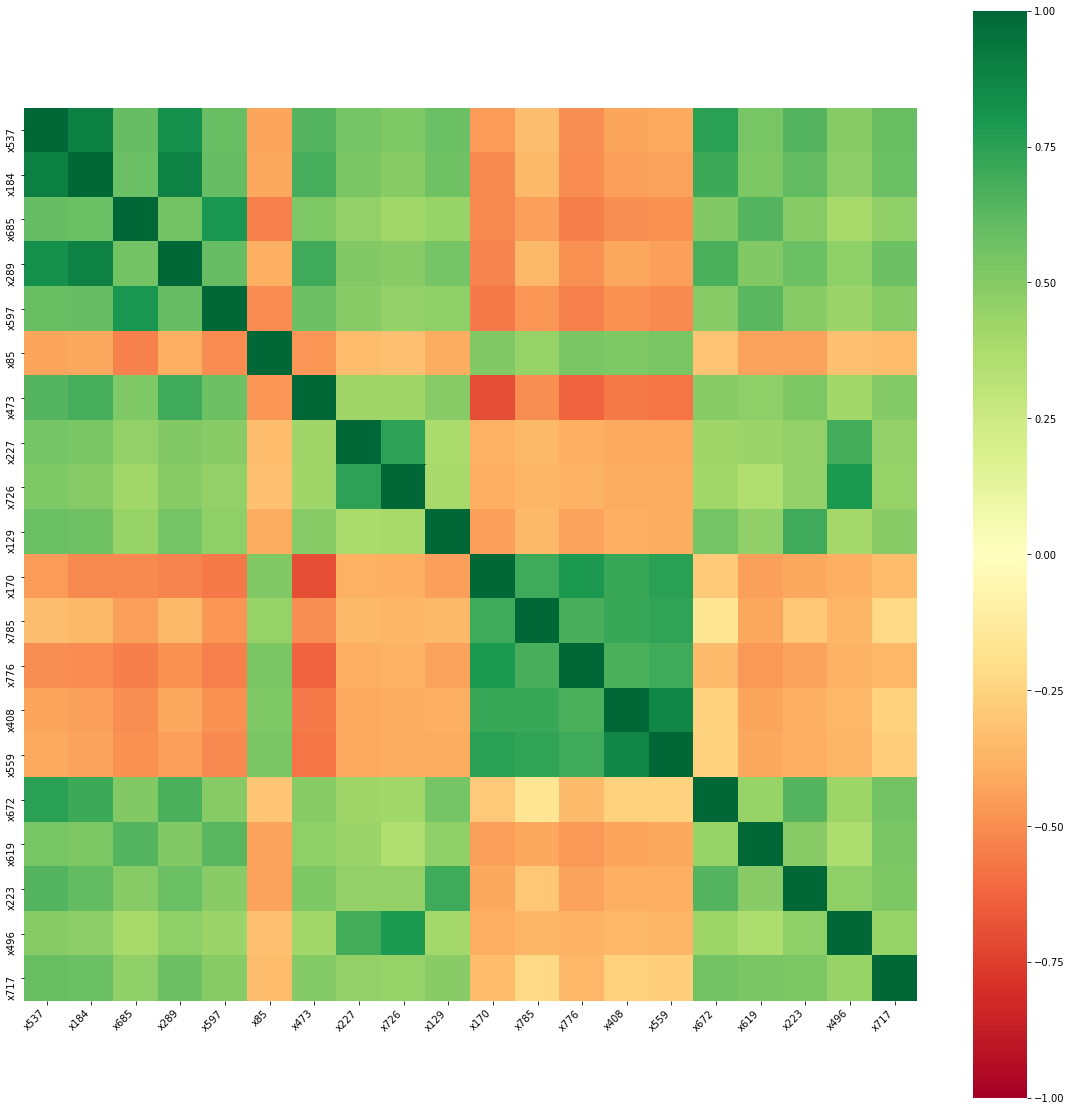

In [18]:
# Plot the correlation matrix heatmap
import matplotlib.pyplot as plt
feature_subset = ['x537', 'x184', 'x685', 'x289', 'x597', 'x85', 'x473', 'x227', 'x726', 'x129', 'x170', 'x785', 'x776', 'x408', 'x559', 'x672', 'x619', 'x223', 'x496', 'x717']
plt.figure(figsize=(20,20))

corr = x_train[feature_subset].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="RdYlGn",
    # cmap=sns.diverging_palette(20, 220, n=200),
    square=True # ,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

corr = corr[correlations > 0.7]
corr.dropna(thresh=1)

# A lot of very correlated values --> need dim reduction!!

In [4]:
# Impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

def impute_missing_values(strategy="median"):
    if strategy == "median":
        imp = SimpleImputer(missing_values=np.nan, strategy='median')
    elif strategy == "mean":
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    elif strategy == "iterative":
        imp = IterativeImputer(max_iter=10, random_state=0)
    elif strategy == "Knn":
        imp = KNNImputer(n_neighbors=2, weights="uniform") # This probably requires standardized data!!
    return imp

imp = impute_missing_values("median")
imp.fit(x_train)
columns = x_train.columns.tolist()
x_train = imp.transform(x_train)
x_train = pd.DataFrame(imp.transform(x_train), columns=columns)
print(x_train.shape)
print(y_train.shape)

(1212, 833)
(1212,)


In [9]:
# Feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA

def select_features(option, k):
    if option == "f_regression":
        fit = SelectKBest(score_func=f_regression, k=k)
    elif option == "mutual_info_regression":
        fit = SelectKBest(score_func=mutual_info_regression, k=k)
    elif option == "pca":
        fit = PCA(n_components=k, svd_solver='randomized', whiten=True) # should help with linear dependencies in the data

    return fit


fit = select_features("f_regression", k=20)
fit = fit.fit(x_train, y_train)

# Visualize the scores of each feature
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_train.columns)
df_features = pd.concat([df_columns,df_scores],axis=1)
df_features.columns = ['Feature','Score']
df_features = df_features.round(1)
print(df_features.nlargest(20,'Score'))
temp = df_features.nlargest(20,'Score')["Feature"].values.tolist()
print(temp)

    Feature  Score
538    x537  376.7
185    x184  365.9
686    x685  334.1
290    x289  307.4
598    x597  295.4
86      x85  272.7
474    x473  271.0
228    x227  250.8
727    x726  242.1
130    x129  240.5
171    x170  236.6
786    x785  235.6
777    x776  235.1
409    x408  233.9
560    x559  226.8
673    x672  223.1
620    x619  223.0
224    x223  222.6
497    x496  221.5
718    x717  219.9
['x537', 'x184', 'x685', 'x289', 'x597', 'x85', 'x473', 'x227', 'x726', 'x129', 'x170', 'x785', 'x776', 'x408', 'x559', 'x672', 'x619', 'x223', 'x496', 'x717']


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
# Check for multicollinearity using VIF (variance inflation ratio)
# https://etav.github.io/python/vif_factor_python.html

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vals = []
for i in range(x_train.shape[1]):
    if i%100 == 1:
        tic = time.time()
    temp = variance_inflation_factor(x_train.values, i)
    if i%100 == 0:
        toc = time.time()
        print("Time elapsed: ", toc-tic, " seconds. Loop: ", i)
    vals.append(temp)
vif["VIF Factor"] = vals
vif["features"] = x_train.columns.tolist()

# this code is super slow --> took more than 30 min to compute it.

Time elapsed:  1.7168519496917725  seconds. Loop:  0
Time elapsed:  1.6720468997955322  seconds. Loop:  100


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Time elapsed:  1.4887628555297852  seconds. Loop:  200
Time elapsed:  1.5265123844146729  seconds. Loop:  300
Time elapsed:  1.526738166809082  seconds. Loop:  400
Time elapsed:  1.5147185325622559  seconds. Loop:  500
Time elapsed:  1.5181200504302979  seconds. Loop:  600
Time elapsed:  1.4930083751678467  seconds. Loop:  700
Time elapsed:  1.5057542324066162  seconds. Loop:  800


In [ ]:
# Only one feature is showing up as having high multicollinearity --> There isn't much multicollinearity
vif[vif["VIF Factor"] > 5]

,VIF Factor,features
401,7.741961,x400


In [36]:
# Data normalization
from sklearn import preprocessing

def data_transformation(option):
    if option == "standardize":
        transformer = preprocessing.StandardScaler()
    elif option == "normalize":
        transformer = preprocessing.Normalizer()
    elif "robust":
        transformer = preprocessing.RobustScaler()
    elif "box_cox":
        transformer = preprocessing.PowerTransformer(method='box-cox', standardize=False)    
    elif "log":
        transformer = preprocessing.FunctionTransformer(np.log1p, validate=True)    
    return transformer




In [38]:
# Model choice

from sklearn.linear_model import HuberRegressor, Ridge, ElasticNet, BayesianRidge, 
ARDRegression, RANSACRegressor, TheilSenRegressor

def choose_model(option, alpha=0, epsilon=1.35, l1_ratio=0.5):
    if option == "linear":
        model = LinearRegression()
    elif "ridge":
        model = Ridge(alpha=alpha, random_state=0, normalize=True)
    elif "huber":
        model = HuberRegressor(alpha=alpha, epsilon=epsilon) # More robust to outliers, because it has a slightly different loss function
    elif "elastic_net":
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elif "bayesian_ridge":
        model = BayesianRidge(compute_score=True)
    elif "adrregression":
        model = ARDRegression(compute_score=True)
    elif "ransac":
        model = RANSACRegressor(random_state=42)
    elif "theilsen":
        model = TheilSenRegressor(random_state=42)
    
    return model

model = choose_model("linear")

In [ ]:
# Model selection and hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
pipeline = Pipeline(steps=[('name',variable)])
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}

# define the grid search
search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=cv)

# perform the search
results = search.fit(x_train, y_train)

# summarize best
print('Best score: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))


# For each number of components, find the best classifier results
# results = pd.DataFrame(search.cv_results_)
# components_col = 'param_pca__n_components'
# best_clfs = results.groupby(components_col).apply(
#     lambda g: g.nlargest(1, 'mean_test_score'))



In [ ]:
# Plot the output scores (for each of the parameters):



In [ ]:
# Alternative for the VIF from online .
# Since the code for VIF is super slow given the number of features, we can drop this
# Especially, since here we constantly loop. 
"""
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = SimpleImputer(missing_values = np.nan, strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        k = 0
        while dropped:
            k += 1
            print("Loop: ", k)
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X


transformer = ReduceVIF()

# Only use 10 columns for speed in this example
# X = transformer.fit_transform(x_train[x_train.columns[:]])
"""

'\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\nfrom sklearn.base import BaseEstimator, TransformerMixin\nfrom sklearn.impute import SimpleImputer\n\nclass ReduceVIF(BaseEstimator, TransformerMixin):\n    def __init__(self, thresh=5.0, impute=True, impute_strategy=\'median\'):\n        # From looking at documentation, values between 5 and 10 are "okay".\n        # Above 10 is too high and so should be removed.\n        self.thresh = thresh\n        \n        # The statsmodel function will fail with NaN values, as such we have to impute them.\n        # By default we impute using the median value.\n        # This imputation could be taken out and added as part of an sklearn Pipeline.\n        if impute:\n            self.imputer = SimpleImputer(missing_values = np.nan, strategy=impute_strategy)\n\n    def fit(self, X, y=None):\n        print(\'ReduceVIF fit\')\n        if hasattr(self, \'imputer\'):\n            self.imputer.fit(X)\n        return self\n\n

Steps needed to be done:

- impute missing values
- feature selection (will need to validate against model performance)
- data transformation:
  · whitening
  · normalization/standardization
  · log/function to shape it into normal distr
- Outlier detection:
  · What do I do with them?
  · How do I calcualte them?

In [ ]:
x_train.corrwith(y_train["y"]).abs().sort_values(ascending=False)

x184    0.503154
x537    0.501308
x685    0.481759
x289    0.469931
x597    0.466150
          ...   
x76     0.000022
x193         NaN
x297         NaN
x339         NaN
x629         NaN
Length: 833, dtype: float64

In [ ]:
data = pd.read_csv("D://Blogs//train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")